In [1]:
import csv
import sys
import os
import pandas as pd
import numpy as np
from numpy import *
from datetime import datetime
from operator import itemgetter
from collections import defaultdict

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

#plt.style.use('ggplot')
df=pd.read_excel('H:/lottery/ssq.xls',sheet_name='data')
df.columns=['num', 'date', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'b', 'sr1', 'sr2',
       'sr3', 'sr4', 'sr5', 'sr6', 'sales_volume', 'pool', 'first', 'bonus1', 'second', 'bonus2',
       'third', 'bonus3', 'fourth', 'bonus4', 'fifth', 'bonus5', 'sexth', 'bonus6']
#df.tail()
X = df[[ 'b']]
X.columns=['sr0']
X.tail()

,sr0
2181,2
2182,11
2183,11
2184,11
2185,4


In [2]:
starttime = datetime.now()
num_rows = X.shape[0]
def creat_datasets(X, features ):
    df_ = pd.DataFrame(columns = list(range(0, features)))
    index = 0
    for i in range(features, num_rows+1):
        df_.loc[index] = X[col][i-features: i].reset_index(drop = True)
        index += 1
    return df_

for col in X.columns :
    locals()['df_'+ str(col)] = creat_datasets(X, 200)
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
# 至此据集完成

13 seconds


In [3]:
def split_c(df_):
    # choose frequence >10 samples
    #df = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values #dataframe.as_matrix() 
    ''' why need astpye(int/str), otherwise error with y_type=object??'''
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    return X_, y_, X_train, X_test, y_train, y_test
def score_c(clf, cv=3):
    precision = cross_val_score(clf, X_, y_, cv=cv, scoring='precision_weighted')
    recall = cross_val_score(clf, X_, y_, cv=cv, scoring='recall_weighted')
    fls = cross_val_score(clf, X_, y_, cv=cv, scoring='f1_weighted')
    return precision, recall, fls

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    '''if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)'''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def total_f(pipe_LinearSVC, param_LinearSVC):
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values.reshape(-1)
    #dataframe.as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    
    grid_=GridSearchCV(pipe_LinearSVC, param_LinearSVC, n_jobs=-1, verbose=1, scoring='accuracy')
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    grid_.fit(X_train, y_train)
    # evaluation for best parameters
    precision = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='precision_weighted')
    recall = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='recall_weighted')
    fls = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='f1_weighted')
    new = grid_.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_.best_estimator_)
    
    class_names = np.unique(y_train)
    y_pred = grid_.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

In [ ]:
################    1  mixture.BayesianGaussianMixture
'''
A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite 
number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to 
incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.
'''

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   57.8s finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', av

df_R0 [12] precison: [ 0.02  0.03  0.04] recall: [ 0.06  0.05  0.07] f1: [ 0.03  0.03  0.03]
Pipeline(steps=[('clf', BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='random',
            max_iter=1000, mean_precision_prior=None, mean_prior=None,
            n_components=14, n_init=1, random_state=14, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process'))])
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        25
          2       0.04      0.04      0.04        27
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        23
          5       0.00      0.00      0.00        25
          6       0.00      0.00      0.00        15
          7       0.00      0.00      0.00   

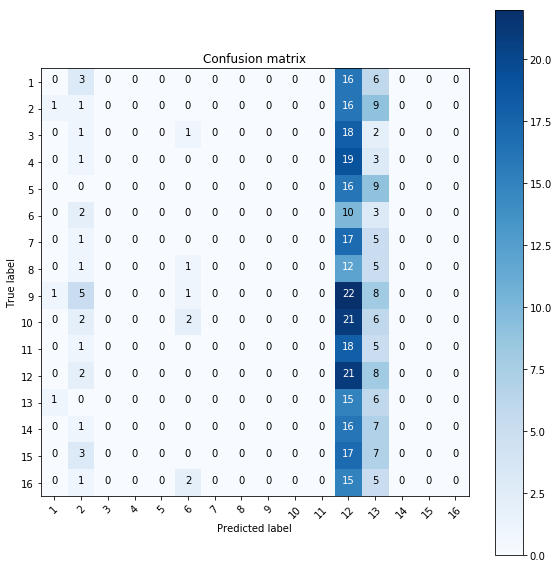

73 seconds


In [9]:
from sklearn.mixture import BayesianGaussianMixture

starttime = datetime.now()

pipe_BGMixture = Pipeline([('clf', BayesianGaussianMixture(random_state=14))])
param_BGMixture = {'clf__n_components': [13, 14, 15, 16, 17], #default = 1; The number of mixture components
                   #Depending on the data and the value of the weight_concentration_prior the model can decide to not use all the components 
                   #by setting some component weights_ to values very close to zero. 
                   #The number of effective components is therefore smaller than n_components.
                   'clf__covariance_type': ['full', 'diag', 'spherical'], #default =full; describing the type of covariance parameters to use.
                   #'full' (each component has its own general covariance matrix),
                    #'tied' (all components share the same general covariance matrix),
                    #'diag' (each component has its own diagonal covariance matrix),
                    #'spherical' (each component has its own single variance).
                   'clf__tol': [0.001, ], #default =0.001,
                   #EM iterations will stop when the lower bound average gain on the likelihood(training datato model) is below the threshold.
                    'clf__reg_covar': [1e-06, ], #default =1e-06, 
                   #Non-negative regularization added to the diagonal of covariance. Allows to assure the covariance matrices are all positive.
                    'clf__max_iter': [1000, ],
                    'clf__n_init': [1, ], 
                #Hyper-parameter : shape parameter for the Gamma distribution prior over the lambda parameter
                    'clf__init_params': ['kmeans', 'random'], #default=kmeans; used to initialize the weights,the means and the covariances.
                    'clf__weight_concentration_prior_type': ['dirichlet_process', ], #default=dirichlet_process
                    #'dirichlet_process' (using the Stick-breaking representation),
                    #'dirichlet_distribution' (can favor more uniform weights).
                   'clf__weight_concentration_prior': [None, ], #default =None= 1/ n_components； float 
                   #The dirichlet concentration of each component on the weight distribution. This is commonly called gamma in the literature. 
                   #The higher concentration puts more mass in the center and will lead to more components being active, 
                   #while a lower concentration parameter will lead to more mass at the edge of the mixture weights simplex. 
                   #The value of the parameter must be greater than 0.
                   'clf__mean_precision_prior': [None, ], #default = None=1 ;  float 
                   #The precision prior on the mean distribution (Gaussian). 
                   #Controls the extend to where means can be placed. Smaller values concentrate the means of each clusters around mean_prior. 
                   #The value of the parameter must be greater than 0. If it is None, it’s set to 1
                   'clf__mean_prior': [None, ],  #array-like, shape (n_features,) #default = None 
                   #The prior on the mean distribution (Gaussian). If it is None, it’s set to the mean of X
                   'clf__degrees_of_freedom_prior': [None, ], #If it is None, it’s set to n_features.
                   #The prior of the number of degrees of freedom on the covariance distributions (Wishart). 
                   'clf__covariance_prior': [None, ], #float or array-like
                   #The prior on the covariance distribution (Wishart). 
                   #If it is None, the emiprical covariance prior is initialized using the covariance of X. 
                   #The shape depends on covariance_type:
                   #        (n_features, n_features) if 'full',
                   #        (n_features, n_features) if 'tied',
                   #        (n_features)             if 'diag',
                   #        float                    if 'spherical'
                   'clf__warm_start': [False, ],
                    'clf__verbose': [0, ], #default = 0
                   #If 1 then it prints the current initialization and each iteration step.
                   #If greater than 1 then it prints also the log probability and the time needed for each step.
                   'clf__verbose_interval': [10, ] #default = 10
                   #Number of iteration done before the next print.
                  }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_BGMixture, param_BGMixture)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    2  mixture.BayesianGaussianMixture
'''
A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite 
number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to 
incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.
'''

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.1min finished
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', av

df_R0 [2] precison: [ 0.02  0.05  0.02] recall: [ 0.08  0.05  0.07] f1: [ 0.02  0.02  0.02]
Pipeline(steps=[('clf', GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
        means_init=None, n_components=15, n_init=1, precisions_init=None,
        random_state=14, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None))])
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        25
          2       0.08      0.26      0.12        27
          3       0.00      0.00      0.00        22
          4       0.50      0.09      0.15        23
          5       0.12      0.16      0.14        25
          6       0.00      0.00      0.00        15
          7       0.05      0.48      0.08        23
          8       0.00      0.00      0.00        19
          9       0.08      0.05      0.06        37
         10       0.00      0.00      0.00        31
         11     

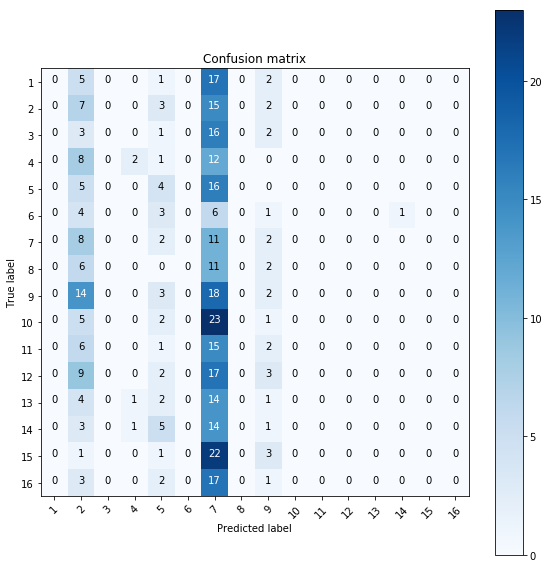

197 seconds


In [9]:
from sklearn.mixture import GaussianMixture

starttime = datetime.now()

pipe_GaussianMixture = Pipeline([('clf', GaussianMixture(random_state=14))])
param_GaussianMixture = {'clf__n_components': [1, 15, 50, 180], #default = 1; The number of mixture components
                   #Depending on the data and the value of the weight_concentration_prior the model can decide to not use all the components 
                   #by setting some component weights_ to values very close to zero. 
                   #The number of effective components is therefore smaller than n_components.
                   'clf__covariance_type': ['full', 'diag', 'spherical'], #default =full; describing the type of covariance parameters to use.
                   #'full' (each component has its own general covariance matrix),
                    #'tied' (all components share the same general covariance matrix),
                    #'diag' (each component has its own diagonal covariance matrix),
                    #'spherical' (each component has its own single variance).
                   'clf__tol': [0.001, ], #default =0.001,
                   #EM iterations will stop when the lower bound average gain on the likelihood(training datato model) is below the threshold.
                    'clf__reg_covar': [1e-06, ], #default =1e-06, 
                   #Non-negative regularization added to the diagonal of covariance. Allows to assure the covariance matrices are all positive.
                    'clf__max_iter': [1000, ],
                    'clf__n_init': [1, ], 
                #Hyper-parameter : shape parameter for the Gamma distribution prior over the lambda parameter
                    'clf__init_params': ['kmeans', 'random'], #default=kmeans; used to initialize the weights,the means and the covariances.
                    'clf__weights_init': [None, ], #default=None; array-like, shape (n_components, ), optional
                    #The user-provided initial weights. If it None, weights are initialized using the init_params method
                    'clf__means_init': [None, ], #default =None; The user-provided initial means, 
                         #If it None, means are initialized using the init_params method.
                   'clf__precisions_init': [None, ], #default = None ;  array-like 
                   #The user-provided initial precisions (inverse of the covariance matrices)
                   #If it None, precisions are initialized using the ‘init_params’ method. The shape depends on ‘covariance_type’:
                   #        (n_components,)                        if 'spherical',
                   #        (n_features, n_features)               if 'tied',
                   #        (n_components, n_features)             if 'diag',
                   #        (n_components, n_features, n_features) if 'full'
                   'clf__warm_start': [False, ],
                    'clf__verbose': [0, ], #default = 0
                   #If 1 then it prints the current initialization and each iteration step.
                   #If greater than 1 then it prints also the log probability and the time needed for each step.
                   'clf__verbose_interval': [10, ] #default = 10
                   #Number of iteration done before the next print.
                        }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_GaussianMixture, param_GaussianMixture)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
